# Projeto #2 - Classificador supervisionado

Antes de começar, leia as [Instruções](https://github.com/thvmm/pos-ds-ia/tree/master/projeto_2#instru%C3%A7%C3%B5es) e os [Critérios de Avaliação](https://github.com/thvmm/pos-ds-ia/tree/master/projeto_2#crit%C3%A9rios-de-avalia%C3%A7%C3%A3o)


### 1) Qual a base escolhida?

# A base escolhida foi - eeg-eye-state (estado de olhos abertos/fechados) 

https://www.openml.org/d/1471

O objetivo do trabalho é classificar se os olhos das pessoas estão abertos ou fechado. As 14 features são medições das ondas cerebrais dos indivídios e através delas, deve-se prever se os olhos estão ou não fechados.

Especificamente, uma gravação eletroencefalográfica (EEG) foi feita de uma única pessoa por 117 segundos (pouco menos de dois minutos) enquanto o sujeito abria e fechava os olhos, que eram gravados por uma câmera de vídeo. O estado aberto / fechado foi então registrado em cada etapa do rastreamento EEG manualmente.

8.255 (55,12%) instâncias do corpus correspondem ao olho aberto e 6.722 (44,88%)instâncias ao olho fechado.


### 2) **(10%)** Pré-processamento: entendimento do conjunto de dados
- Quais são minhas features?
- Quais são minhas classes?
- Como estão distribuidas minhas classes?
- Checagem se os valores estão dentro de um limite permitido ou razoável.
- Tratamento de valores ausentes por eliminação ou substituição.
- Conversão do tipo de dados.


In [0]:
# Implemente sua análise aqui. Use mais blocos se achar que ficará mais organizado.

In [0]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt


In [3]:
from google.colab import drive
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [0]:
df = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/projeto_2/olhosBD.csv")

In [0]:
print ("A base escolhida tem 15 features: ", df.columns)

In [0]:
print ("O target possui duas classes: ",df["Class"].unique())

A classe possui dois valores, que definem se os olhos estão abertos ou fechados.

In [0]:
print ("A base possui ", len(df), " registros")

In [0]:
print ('No de dimensões:',df.ndim)

In [0]:
# a base não possui valores nulos e nem ausentes
df.isnull().sum()

In [0]:
# Todas as features são numéricas
df.dtypes

In [0]:
# Há uma discrepância entre os valores minimos e máximos conforme observamos abaixo:
df.describe()

In [0]:
# obter os valores mais comuns do dataset
df.mode()

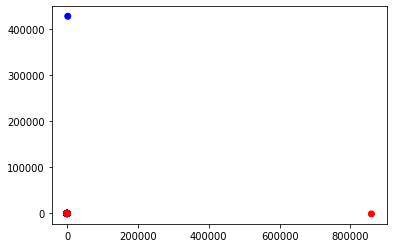

In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_train)
r2 = pca.transform(X_train)

#plt.scatter(r2[:,0], r2[:,1])

cores = {1:'red', 2:'blue'}
plt.scatter(r2[:,0], r2[:,1], c=y_train.apply(lambda x: cores[x]), cmap='tab10')



---



In [0]:
# Separando o target(os valores que serão previstos)
target = df['Class']

# retirar a coluna Class do DataFrame
df = df.drop(['Class'],axis=1)


SEPARAÇÃO DOS DADOS EM TREINO E TESTE

In [0]:
# importar train_test_split do sklearn para dividir dados de treino e teste
from sklearn.model_selection import train_test_split

In [0]:
# semente aleatória
RANDOM_STATE = 1

In [0]:
# o parâmetro test_size indica o percentual de amostras que serão selecionadas para teste

X_train, X_test, y_train, y_test = train_test_split(df, target, 
                                                    test_size=0.35, # 35% será amostra de teste
                                                    random_state=RANDOM_STATE, stratify=target)

In [0]:
print('X_train:', X_train.shape,'y_train:', y_train.shape,'\n\nX_test:', X_test.shape,'y_test:', y_test.shape )

X_train: (9737, 14) y_train: (9737,) 

X_test: (5243, 14) y_test: (5243,)




---
**REMOÇÃO DE OUTLIERS**

Este item foi mantido somente como registro de como foi feita a tentativa de remover os registros considerados outliers, que após serem disponibilizados nos classificadores, a acurácio ficou muito ruim, portanto, não foi aproveitado no trabalho.


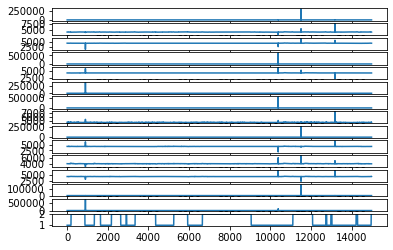

In [0]:
data = df
# recuperar dados como matriz numpy
values = data.values
# plotando os dados para avaliação
plt.figure()
for i in range(values.shape[1]):
	plt.subplot(values.shape[1], 1, i+1)
	plt.plot(values[:, i])
plt.show()

In [0]:
# detecção e remoção de outliers
from numpy import mean
from numpy import std
from numpy import delete
from numpy import savetxt

# step over each EEG column
for i in range(values.shape[1] - 1):
	# calculo da média de cada coluna e o desvio padrão
  data_mean, data_std = mean(values[:,i]), std(values[:,i]) 
	
  # define os limites do outlier
  cut_off = data_std * 4 
  lower, upper = data_mean - cut_off, data_mean + cut_off
	
  # remove os registros muito pequenos
  too_small = [j for j in range(values.shape[0]) if values[j,i] < lower]
  values = delete(values, too_small, 0)
  print('>deleted %d rows' % len(too_small))
	# remove os registros muito grandes
  too_large = [j for j in range(values.shape[0]) if values[j,i] > upper]
  values = delete(values, too_large, 0)
  print('>deleted %d rows' % len(too_large))
# salva os registros excluídos num arquivo
savetxt('/content/gdrive/My Drive/Colab Notebooks/projeto_2/olhos_sem_outliers.csv', values, delimiter=',')

In [0]:
print ("Registros excluídos:", len(df) - len(values), " / registros restantes: ", len(values))

Registros excluídos: 676  / registros restantes:  14304


In [0]:
data2.head(3)

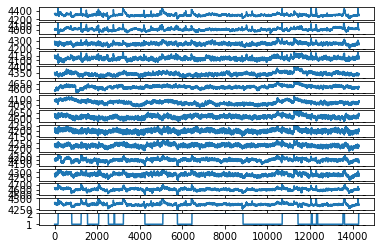

In [0]:
data2 = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/projeto_2/olhos_sem_outliers.csv", header=None)
# recuperar dados como matriz numpy
values2 = data2.values
# crie uma subparcela para cada série temporal
plt.figure()
for i in range(values2.shape[1]):
	plt.subplot(values2.shape[1], 1, i+1)
	plt.plot(values2[:, i])
plt.show()



---



In [0]:
# renomeando as colunas
cols = ('V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14','Class')
data2.set_axis(cols, axis='columns', inplace=True)



---



In [0]:
# Separando o target(os valores que serão previstos)
target = data2['Class']

# retirar a coluna Class do DataFrame
data2 = data2.drop(['Class'],axis=1)


SEPARAÇÃO DOS DADOS EM TREINO E TESTE

In [0]:
# importar train_test_split do sklearn para dividir dados de treino e teste
from sklearn.model_selection import train_test_split

In [0]:
# semente aleatória
RANDOM_STATE = 1

In [0]:
# o parâmetro test_size indica o percentual de amostras que serão selecionadas para teste

X_train, X_test, y_train, y_test = train_test_split(data2, target, 
                                                    test_size=0.35, # 35% será amostra de teste
                                                    random_state=RANDOM_STATE, stratify=target)

In [0]:
print('X_train:', X_train.shape,'y_train:', y_train.shape,'\n\nX_test:', X_test.shape,'y_test:', y_test.shape )

X_train: (10728, 14) y_train: (10728,) 

X_test: (3576, 14) y_test: (3576,)


### 3) **(80%)** Nos blocos seguintes implemente seus classificadores (serão implementados 2 métodos diferentes).

**Perceptron**

#### 3.2) **(10%)** Baseline - Implemente seu classificador da forma mais simples possível para esse ser seu baseline

Será executado os parâmetros padrões do Perceptron

In [10]:
from sklearn.linear_model import Perceptron

clf = Perceptron(penalty=None, alpha=0.0001, fit_intercept=True, max_iter=1000, 
                 tol=0.001, shuffle=True, verbose=0, eta0=1.0, n_jobs=None, 
                 random_state=0, early_stopping=False, validation_fraction=0.1, 
                 n_iter_no_change=5, class_weight=None, warm_start=False)

clf.fit(X_train, y_train)


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
y_pred = clf.predict(X_test)


In [12]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.55      1.00      0.71      2890
           2       0.00      0.00      0.00      2353

    accuracy                           0.55      5243
   macro avg       0.28      0.50      0.36      5243
weighted avg       0.30      0.55      0.39      5243



**CROSS-VALIDATION**

Utilizando o cross validation para estimar a precisão do uso do perceptron no conjunto de dados, ajustando om modelo e computando a pontuação 'n' vezes consecutivas (com divisões diferentes a cada vez):

**Dados de treino**

In [13]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_train, y_train, cv=5)
scores

array([0.44917864, 0.4486653 , 0.55110426, 0.58243451, 0.57062147])



---



In [0]:
#import multiprocessing
#from sklearn.linear_model import Perceptron
from sklearn.model_selection import GridSearchCV


In [0]:
param_grid = [
              {
                 'alpha':[0.0009, 0.0001, 0.001, 0.1],
                 'class_weight': ['None', 'balanced'], 
                 'early_stopping': ['False', 'True'], 
                 'eta0': [1.0, 3.0, 6.0], 
                 'fit_intercept': ['True', 'False'],
                 'max_iter': [500, 1000, 10000], 
                 'n_iter_no_change': [2, 5, 10],
                 'n_jobs': ['None', -1, 1],
                 'penalty':['l2','l1','elasticnet'], 
                 'random_state': [0, 1], 
                 'shuffle': ['True', 'False'],
                 'tol': [0.001,'1e-3'], 
                 'validation_fraction': [0.001, 0.1, 0,9],
                 'verbose': [0, 1], 
                 'warm_start': ['False', 'True']
              }

]

gs = GridSearchCV(estimator=Perceptron(), param_grid=param_grid, scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count())

In [24]:
gs.fit(X_train, y_train)

ValueError: ignored

In [0]:
gs.best_estimator_Percetron()

In [0]:
cross_val_score(gs.estimator_,X_train_normalizado, y_train_normalizado,scoring='accuracy',cv=10).mean()



---



In [34]:
from sklearn.model_selection import GridSearchCV
parameters = {'random_state': [2]}
svc = Perceptron()
clf = GridSearchCV(Perceptron, parameters)
clf.fit(X_train, y_train)
GridSearchCV(estimator=Perceptron(),param_grid=parameters)
sorted(clf.cv_results_.keys())

TypeError: ignored



---



**Dados de teste**

In [15]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_test, y_test, cv=5)
scores

array([0.55100095, 0.55100095, 0.44899905, 0.57156489, 0.57442748])

O melhor score obtido nos dados de:
- treino = 0.58243451
- teste = 0.57442748.


**Visualizando os dados num gráfico**

In [0]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    
    plt.grid(False)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

<b>Usando a função declarada acima plotamos novamente a matriz de confusão</b>

In [0]:
plot_confusion_matrix(cnf_matrix, target_names, normalize=False, 
                      title='Confusion matrix', cmap=plt.cm.Greens)

#### 3.3) **(20%)** Versão 1 - O que podemos fazer para melhorar nosso baseline? Aplique técnicas como redução de dimensionalidade, normalização ou outras. Compare os resultados.

**NORMALIZANDO OS DADOS USANDO MIN/MAX**

Os dados serão normalizados para visualizar se há melhora na execução do Perceptron.

In [0]:
df2 = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/projeto_2/olhosBD.csv")

In [0]:
df2.head(3)

In [21]:
cols=df2.columns
cols

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'Class'],
      dtype='object')

In [0]:
# o target será normalizado ficando 1 => 0 e 2 => 1
from sklearn import preprocessing

x = df2 #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_normalizado = pd.DataFrame(x_scaled)
df_normalizado

# renomeando as colunas
df_normalizado.set_axis(cols, axis='columns', inplace=True)

In [0]:
# target são os valores que serão previstos
target_normalizado = df_normalizado.Class

In [0]:
# retirar a coluna Class do DataFrame
df_normalizado = df_normalizado.drop(['Class'],axis=1)

In [25]:
# a base não possui valores nulos e nem ausentes
target_normalizado.unique()

array([0., 1.])

In [0]:
# renomeando as colunas
cols = ('V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14')
df_normalizado.set_axis(cols, axis='columns', inplace=True)

In [0]:
print (df_normalizado.shape, target_normalizado.shape)

(14304, 14) (14304,)


In [0]:
df_normalizado.head(3)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
0,0.010702,0.236931,0.556326,0.002648,0.515557,0.005053,0.003558,0.027383,0.010837,0.498575,0.264230,0.426286,0.029886,0.004237
1,0.010687,0.236004,0.557117,0.002649,0.513684,0.005054,0.003559,0.026619,0.010795,0.496148,0.263219,0.426071,0.029865,0.004224
2,0.010697,0.236416,0.557379,0.002661,0.512514,0.005046,0.003558,0.023390,0.010783,0.495197,0.262931,0.426610,0.029838,0.004231


In [0]:
target_normalizado.head(3)

0    0.0
1    0.0
2    0.0
Name: Class, dtype: float64


SEPARAÇÃO DOS DADOS EM TREINO E TESTE

In [0]:
# importar train_test_split do sklearn para dividir dados de treino e teste
from sklearn.model_selection import train_test_split

In [0]:
# semente aleatória
RANDOM_STATE = 1

In [0]:
# o parâmetro test_size indica o percentual de amostras que serão selecionadas para teste

X_train_normalizado, X_test_normalizado, y_train_normalizado, y_test_normalizado = train_test_split(df_normalizado, target_normalizado, 
                                                    test_size=0.35, # 35% será amostra de teste
                                                    random_state=RANDOM_STATE, stratify=target)

In [0]:
print('Dados: ', X_train_normalizado.shape,'Target:', y_train_normalizado.shape )

Dados:  (11235, 14) Target: (11235,)



---
Executando o Perceptron com os dados normalizados e parâmetros padrão


In [0]:
from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron
X, y = load_digits(return_X_y=True)

In [49]:
clf = Perceptron(penalty=None, alpha=0.0001, fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True, 
       verbose=0, eta0=1.0, n_jobs=None, random_state=0, early_stopping=False, 
       validation_fraction=0.1, n_iter_no_change=5, class_weight=None, warm_start=False)

clf.fit(X_train_normalizado, y_train_normalizado)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
y_pred_normalizado = clf.predict(X_test_normalizado)


**Avaliando a acurácia**

In [51]:
from sklearn import metrics
print(metrics.classification_report(y_test_normalizado,y_pred_normalizado))

              precision    recall  f1-score   support

         0.0       0.57      0.95      0.71      2890
         1.0       0.62      0.10      0.18      2353

    accuracy                           0.57      5243
   macro avg       0.59      0.53      0.44      5243
weighted avg       0.59      0.57      0.47      5243



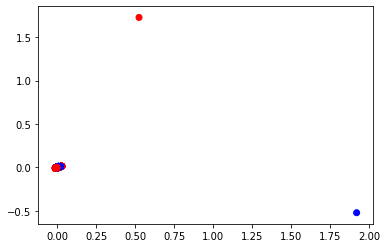

In [52]:
# plotando os dados após normalização
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_train_normalizado)
r2 = pca.transform(X_train_normalizado)

cores = {0:'red', 1:'blue'} # definindo as cores do target
plt.scatter(r2[:,0], r2[:,1], c=y_train_normalizado.apply(lambda x: cores[x]), cmap='tab10')

É possível observar que os dados não são linearmente separáveis.

**CROSS-VALIDATION**

Utilizando o cross validation para estimar a precisão do uso do perceptron no conjunto de dados, ajustando om modelo e computando a pontuação 'n' vezes consecutivas (com divisões diferentes a cada vez):

**Dados de treino**

In [53]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_train_normalizado, y_train_normalizado, cv=15)
scores

array([0.56923077, 0.55076923, 0.57010786, 0.58243451, 0.57473035,
       0.55161787, 0.55161787, 0.57010786, 0.55161787, 0.57164869,
       0.54391371, 0.57781202, 0.57627119, 0.56856703, 0.55007704])

**Dados de teste**

In [54]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_test_normalizado, y_test_normalizado, cv=15)
scores

array([0.44857143, 0.54571429, 0.56571429, 0.44857143, 0.54857143,
       0.57714286, 0.44857143, 0.44857143, 0.44985673, 0.44985673,
       0.55587393, 0.44985673, 0.44985673, 0.5530086 , 0.60744986])

O melhor score obtido nos dados de:
- treino: sem normalização = 0.58243451 / com normalização = 0.59076923
- teste = sem normalização = 0.57442748 / com normalização = 0.58739255

Houve uma pequena melhora com a normalização dos dados.

3.4) **(10%)** Tunning - Agora que temos um resultado promissor, vamos tentar melhorar o resultado alterando um ou mais hiper-parametro. Compare os resultados.

In [0]:
from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron
X, y = load_digits(return_X_y=True)

In [58]:
clf = Perceptron(penalty=None, alpha=0.0001, fit_intercept=False, max_iter=1000, tol=0.001, shuffle=True, 
                 verbose=0, eta0=1.0, n_jobs=None, random_state=1, early_stopping=False, validation_fraction=0.1, 
                 n_iter_no_change=10, class_weight=None, warm_start=True)


clf.fit(X_train_normalizado, y_train_normalizado)


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=False, max_iter=1000, n_iter_no_change=10, n_jobs=None,
           penalty=None, random_state=1, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=True)

**Avaliando a acurácia**

In [0]:
y_pred_normalizado = clf.predict(X_test_normalizado)


In [60]:
from sklearn import metrics
print(metrics.classification_report(y_test_normalizado,y_pred_normalizado))

              precision    recall  f1-score   support

         0.0       0.72      0.27      0.39      2890
         1.0       0.49      0.87      0.63      2353

    accuracy                           0.54      5243
   macro avg       0.60      0.57      0.51      5243
weighted avg       0.62      0.54      0.50      5243



**Identificar qual a melhor configuração dos parametros para obter o melhor score no perceptron**

In [0]:
# retornando a melhor acuracia
from sklearn.linear_model import Perceptron
from sklearn.model_selection import cross_val_score


perc = Perceptron(n_iter_no_change=10)
cross_val_score(perc, X_train_normalizado, y_train_normalizado,scoring='accuracy',cv=10).mean()

In [60]:
Perceptron.get_params(Perceptron, deep=True).keys()

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


dict_keys(['alpha', 'class_weight', 'early_stopping', 'eta0', 'fit_intercept', 'max_iter', 'n_iter_no_change', 'n_jobs', 'penalty', 'random_state', 'shuffle', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [63]:
import multiprocessing
from sklearn.linear_model import Perceptron
from sklearn.model_selection import GridSearchCV

param_grid = [
              {
                 'alpha':[0.0009, 0.0001, 0.001, 0.1],
                 'class_weight': ['None', 'balanced'], 
                 'early_stopping': ['False', 'True'], 
                 'eta0': [1.0, 3.0, 6.0], 
                 'fit_intercept': ['True', 'False'],
                 'max_iter': [500, 1000, 10000], 
                 'n_iter_no_change': [2, 5, 10],
                 'n_jobs': ['None', -1, 1],
                 'penalty':['l2','l1','elasticnet'], 
                 'random_state': [0, 1], 
                 'shuffle': ['True','False'], 
                 'tol': [0.001,'1e-3'], 
                 'validation_fraction': [0.001, 0.1, 0,9],
                 'verbose': [0, 1], 
                 'warm_start': ['False', 'True']
              }

]

gs = GridSearchCV(estimator=Perceptron(), param_grid=param_grid, scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count())
gs.fit(X_train_normalizado, y_train_normalizado)
gs.best_estimator_Percetron()
cross_val_score(gs.estimator_,X_train_normalizado, y_train_normalizado,scoring='accuracy',cv=10).mean()

ValueError: ignored



---



In [64]:
from sklearn.model_selection import GridSearchCV

parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
#clf = GridSearchCV(perceptron, parameters)

Perceptron = svm.Perceptron()

clf = Perceptron()
clf.fit(X_train_normalizado, y_train_normalizado)

NameError: ignored



---


**CROSS-VALIDATION**

**Dados de treino**

In [61]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_train_normalizado, y_train_normalizado, cv=15)
scores

array([0.44923077, 0.55538462, 0.6009245 , 0.57473035, 0.57164869,
       0.55315871, 0.56086287, 0.55469954, 0.55161787, 0.45146379,
       0.44992296, 0.57164869, 0.5577812 , 0.45146379, 0.56548536])

**Dados de teste**

In [62]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf,  X_test_normalizado, y_test_normalizado, cv=15)
scores

array([0.55142857, 0.55142857, 0.56571429, 0.48285714, 0.44857143,
       0.58857143, 0.44857143, 0.44571429, 0.45272206, 0.55587393,
       0.45845272, 0.44985673, 0.44985673, 0.51862464, 0.50429799])

Alterações feitas, parâmetro por parâmetro. Foi informado o melhor score dos dados de *testes*.

penalty / 
= ‘l2’ => 0.55161787 /
= 'l1’ => 0.56086287 /
= ’elasticnet’ => 0.55161787

alpha=0.0006 => 0.58615385 # Constante que multiplica o termo de regularização se a regularização for usada.

fit_intercept=False => 0.57935285

max_iter
=100 => 0.57935285 /
=10000 => 0.57935285

tol
=0.006 => 0.56702619 /
= 0.1 => 0.56702619

shuffle=false => 0.5624037

verbose=6 => 0.57593123 #O nível de verbosidade


eta0=10.0 => 0.57935285 # Constante pela qual as atualizações são multiplicadas.


n_jobs=None-1 => 0.57935285

random_state=3 => 0.58307692

early_stopping=True => 0.56856703

validation_fraction
= 0.5 => 0.57935285 /
= 0.99 => 0.57935285

n_iter_no_change=10 => 0.6009245

class_weight=balanced => 0.54545455

warm_start=True => 0.57935285




O melhor score obtido nos dados de:
- treino: sem normalização = 0.58243451 / com normalização = 0.59076923 / pós alteração do parãmetro n_iter_no_change = 0.6009245 
- teste = sem normalização = 0.57442748 / com normalização = 0.58739255 / pós alteração do parãmetro n_iter_no_change = 0.56571429

Houve uma pequena melhora do score de treino e uma pequena piora no de teste.



---



#### 3.5) Qual método escolhido?

O método foi a **árvore de decisão**

#### 3.6) **(10%)** Baseline - Implemente seu classificador da forma mais simples possível para esse ser seu baseline

In [63]:
# Usando o módulo tree para chamar o classificador de árvore de decisão
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
# prevendo o target
y_pred = clf.predict(X_test)

In [98]:
#Avaliando o resultado: acuracia
from sklearn.metrics import accuracy_score

acuracia = accuracy_score(y_test, y_pred)
print("Acuracia da árvore sem normalização: "+str(acuracia))
print("\n\n")

Acuracia da árvore sem normalização: 0.8239557505245089





**Avaliando a acurácia**

In [65]:
print(metrics.classification_report(y_test_normalizado,y_pred_normalizado))

              precision    recall  f1-score   support

         0.0       0.72      0.27      0.39      2890
         1.0       0.49      0.87      0.63      2353

    accuracy                           0.54      5243
   macro avg       0.60      0.57      0.51      5243
weighted avg       0.62      0.54      0.50      5243



#### 3.7) **(20%)** Versão 1 - O que podemos fazer para melhorar nosso baseline? Aplique técnicas como redução de dimensionalidade, normalização ou outras. Compare os resultados.

-- **Execução da árvore com os dados normalizados (MIN/MAX)** ---

In [136]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train_normalizado, y_train_normalizado)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
# prevendo o target
y_pred_normalizado = clf.predict(X_test_normalizado)

In [138]:
#Avaliando o resultado: acuracia
acuracia = accuracy_score(y_test_normalizado, y_pred_normalizado)
print("Acuracia da árvore com normalização: "+str(acuracia))
print("\n\n")

Acuracia da árvore com normalização: 0.8245279420179287





Acuracia da árvore sem normalização: 0.8239557505245089

Acuracia da árvore com normalização: 0.8245279420179287


Houve uma pequena melhora após a normalização.


#### 3.8) **(10%)** Tunning - Agora que temos um resultado promissor, vamos tentar melhorar o resultado alterando um ou mais hiper-parametro. Compare os resultados.

***************************************
Especificar o número mínimo de amostras para divisão do nó. 

Valores altos previnem a criação de modelos complexos ou podem causar underfitting.

Especificar o número mínimo de amostras para o nível folha. Nos permite controlar o crescimento da árvore e deve ser considerado em cenários com dados desbalanceados.

Profundidade máxima da árvore.
Número máximo de features para considerar durante a divisão.
*****************************************

In [169]:
# splitter: estratégia utilizada para dividir o nó de decisão.
# max_depth: profundidade máxima da árvore.
# min_samples_split: número de amostras mínimas para considerar um nó para divisão.
# min_samples_leaf: número de amostras mínimas no nível folha.


clf = tree.DecisionTreeClassifier(ccp_alpha=0.0001, class_weight=None, criterion='gini',
                       max_depth=50, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')
clf.fit(X_train_normalizado, y_train_normalizado)max_depth

DecisionTreeClassifier(ccp_alpha=0.0001, class_weight=None, criterion='gini',
                       max_depth=50, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [0]:
# prevendo o target
y_pred_normalizado = clf.predict(X_test_normalizado)

In [171]:
#Avaliando o resultado: acuracia
acuracia = accuracy_score(y_test_normalizado, y_pred_normalizado)
print("Acuracia da árvore com normalização: "+str(acuracia))
print("\n\n")

Acuracia da árvore com normalização: 0.8287240129696738





In [1]:
from sklearn import metrics
print(metrics.classification_report(y_test_normalizado, y_pred_normalizado))

NameError: ignored

Acuracia da árvore sem normalização: 0.8239557505245089

Acuracia da árvore com normalização: 0.8245279420179287

Acuracia da árvore com normalização: 0.8273888994850277 => com random_state=1

Acuracia da árvore com normalização: 0.8287240129696738 => com random_state=1 e ccp_alpha=0.0001

Acuracia da árvore com normalização: 0.8287240129696738 => com random_state=1, ccp_alpha=0.0001 e max_depth=50



Houve uma pequena melhora após a normalização.


### 5) **(10%)** Conclusões

*Compare seus resultados. Imaginando que sua solução fosse para produção, qual deles você escolheria? Por que? Quais os riscos você enxerga? O que recomendaria de próximos passos para melhorar os resultados?*

O melhor resultado do perceptron foi 0.6009245 e da árvore 0,8287240129696738.

Os dados parecem não ser linearmente separáveis, logo, o melhor modelo a ser utilizado é a árvore de decisão.

Um risco:
1 - pode sofrer overfitting (sobreajuste), se ajustar muito aos dados de treino e não ter uma performance muito boa com os dados de teste.
2 - Se houver uma pequena alteração nos dados de treino, novas árvores serão produzidas, ou seja, são instáveis.